In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tensorflow.keras import layers,datasets,models

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [8]:
y_train[:-5]

array([[6],
       [9],
       [9],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

*Converting it into 2d arry to 1d arry by reshaping it*

In [9]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [10]:
y_train[:-5]

array([6, 9, 9, ..., 0, 1, 0], dtype=uint8)

In [11]:
y_test[:-5]

array([3, 8, 8, ..., 3, 5, 3], dtype=uint8)

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

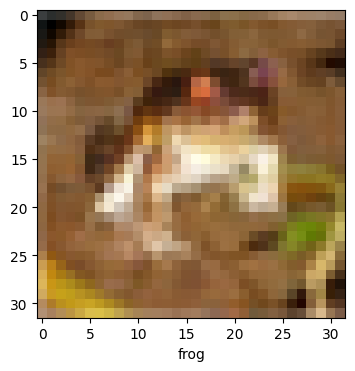

In [19]:
def plot_sample(X,y,index):
   plt.figure(figsize=(15,4))
   plt.imshow(X[index])
   plt.xlabel(classes[y[index]])


plot_sample(X_train,y_train,0)

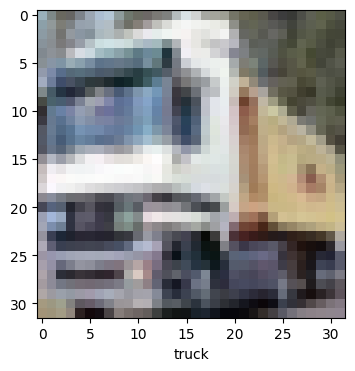

In [20]:
plot_sample(X_train,y_train,1)

**Normalizing the Data because image has 3 channels (R,G,B)**

*Normalize 0----->1*

In [21]:
X_train=X_train/255.0
y_train=y_train/255.0

**ANN Network**

In [25]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #input layer
    layers.Dense(3000,activation="relu"),   #hiddenlayer 1
    layers.Dense(1000,activation="relu"),  #hiddenlayer 2
    layers.Dense(100,activation="relu"),  #hiddenlayer 3
    layers.Dense(10,activation="softmax")  #outputlayer
])

In [29]:
model.compile(optimizer='SGD',
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
)

In [30]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 156s 99ms/step - loss: 0.0041 - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 184s 118ms/step - loss: 2.7586e-04 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.7276e-04 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 161s 103ms/step - loss: 1.2759e-04 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 168s 107ms/step - loss: 1.0172e-04 - accuracy: 0.1000


In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
y_pred=model.predict(X_test)

313/313 [==============================] - 9s 28ms/step


In [33]:
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**CNN Networks**

In [35]:
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [39]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [40]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 101s 64ms/step - loss: 0.0033 - accuracy: 0.0999
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 9.4417e-09 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 7.6233e-09 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 4.4413e-09 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 2.2291e-09 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 8.0822e-10 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 3.1471e-10 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4543e-10 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 8.8215e-11 - accuracy: 0.1000
Epoch 10/10
1563/1563 [========

In [41]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 17060.9531 - accuracy: 0.1000


[17060.953125, 0.10000000149011612]

In [42]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

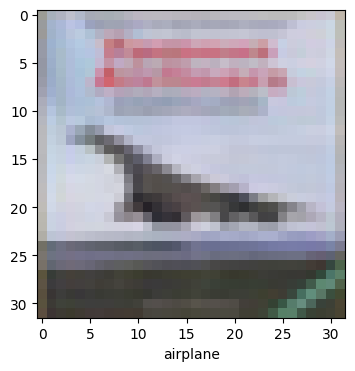

In [44]:
plot_sample(X_test,y_test,3)

In [45]:
classes[y_classes[3]]

'airplane'